In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
from scipy.stats import variation

In [2]:
df = pd.read_csv("Banco_De_Dados_TP.csv", sep = ';', encoding='latin-1')
df = df.replace(",", ".", regex = True)
df = df[["Satisfação", "Origem", "Altura", "Peso"]]


In [3]:
df

,Satisfação,Origem,Altura,Peso
0,1.0,Cariri,174.16,93.82148523
1,4.0,Litoral,194.70,64.13460046
2,2.0,Brejo,173.23,74.21540562
3,0.0,Agreste,194.76,70.92043138
4,3.0,Litoral,171.05,51.76172085
...,...,...,...,...
115,NaN,NaN,208.01,85.57086762
116,NaN,NaN,164.45,78.44065653
117,NaN,NaN,199.00,71.82189979
118,NaN,NaN,184.99,59.36611973


In [63]:
def central(dfcoluna):
    media = dfcoluna.mean()
    mediana = dfcoluna.median()
    moda = dfcoluna.mode().squeeze()
    media_geom = statistics.geometric_mean(dfcoluna)
    media_harm = statistics.harmonic_mean(dfcoluna)
    
    return {"Média": media, "Média Geométrica" : media_geom, "Média Harmônica": media_harm, "Mediana" : mediana, "Moda" : moda}

In [67]:
def dispersao(dfcoluna):
    variancia = np.var(dfcoluna)
    desvio_p = np.std(dfcoluna)
    desvio_absoluto = dfcoluna.mad()
    coeficiente_de_variacao = variation(dfcoluna, axis = 0)
    return {"Variância": variancia, "Desvio Padrão" : desvio_p, "Desvio Absoluto": desvio_absoluto, 
            "Coeficiente de Variação" : coeficiente_de_variacao}

# Frequência de Satisfação

In [4]:
df_Satisfacao = pd.DataFrame(df["Satisfação"].value_counts().sort_index()).rename(columns={"Satisfação" : "Frequencia Simples"})
df_Satisfacao["Frequencia Relativa"] = df["Satisfação"].value_counts(normalize=  True)
df_Satisfacao["Frequencia Relativa Percentual"] = df_Satisfacao["Frequencia Relativa"] * 100
df_Satisfacao["Frequencia Acumulada"] = df_Satisfacao["Frequencia Simples"].cumsum()
df_Satisfacao["Frequencia Relativa Acumulada"] = df_Satisfacao["Frequencia Relativa"].cumsum()

In [5]:
df_Satisfacao

,Frequencia Simples,Frequencia Relativa,Frequencia Relativa Percentual,Frequencia Acumulada,Frequencia Relativa Acumulada
0.0,8,0.133333,13.333333,8,0.133333
1.0,10,0.166667,16.666667,18,0.300000
2.0,14,0.233333,23.333333,32,0.533333
3.0,8,0.133333,13.333333,40,0.666667
4.0,10,0.166667,16.666667,50,0.833333
5.0,10,0.166667,16.666667,60,1.000000


In [64]:
centralidade_satisfacao = {}
for coluna in df_Satisfacao:   
    dado = df_Satisfacao[coluna]
    centralidade_satisfacao[coluna] = central(dado)

In [65]:
centralidade_satisfacao

{'Frequencia Simples': {'Média': 10.0,
  'Média Geométrica': 9.818639955055346,
  'Média Harmônica': 9.655172413793103,
  'Mediana': 10.0,
  'Moda': 10},
 'Frequencia Relativa': {'Média': 0.16666666666666666,
  'Média Geométrica': 0.1636439992509224,
  'Média Harmônica': 0.16091954022988506,
  'Mediana': 0.16666666666666666,
  'Moda': 0.16666666666666666},
 'Frequencia Relativa Percentual': {'Média': 16.66666666666666,
  'Média Geométrica': 16.36439992509224,
  'Média Harmônica': 16.091954022988503,
  'Mediana': 16.666666666666664,
  'Moda': 16.666666666666664},
 'Frequencia Acumulada': {'Média': 34.666666666666664,
  'Média Geométrica': 28.64940582987394,
  'Média Harmônica': 21.940071102082275,
  'Mediana': 36.0,
  'Moda': 0     8
  1    18
  2    32
  3    40
  4    50
  5    60
  Name: Frequencia Acumulada, dtype: int64},
 'Frequencia Relativa Acumulada': {'Média': 0.5777777777777778,
  'Média Geométrica': 0.4774900971645656,
  'Média Harmônica': 0.3656678517013712,
  'Mediana': 0.

In [68]:
dispersao_satisfacao = {}
for colunas in df_Satisfacao:
    dados2 = df_Satisfacao[colunas]
    dispersao_satisfacao[colunas] = dispersao(dados2)

In [69]:
dispersao_satisfacao

{'Frequencia Simples': {'Variância': 4.0,
  'Desvio Padrão': 2.0,
  'Desvio Absoluto': 1.3333333333333333,
  'Coeficiente de Variação': 0.2},
 'Frequencia Relativa': {'Variância': 0.0011111111111111111,
  'Desvio Padrão': 0.03333333333333333,
  'Desvio Absoluto': 0.022222222222222223,
  'Coeficiente de Variação': 0.2},
 'Frequencia Relativa Percentual': {'Variância': 11.111111111111107,
  'Desvio Padrão': 3.3333333333333326,
  'Desvio Absoluto': 2.2222222222222228,
  'Coeficiente de Variação': 0.20000000000000004},
 'Frequencia Acumulada': {'Variância': 316.8888888888889,
  'Desvio Padrão': 17.801373230424918,
  'Desvio Absoluto': 15.333333333333334,
  'Coeficiente de Variação': 0.5135011508776419},
 'Frequencia Relativa Acumulada': {'Variância': 0.08802469135802467,
  'Desvio Padrão': 0.2966895538404153,
  'Desvio Absoluto': 0.25555555555555554,
  'Coeficiente de Variação': 0.5135011508776418}}

## Gráficos

Frequência Simples

<AxesSubplot:ylabel='Frequencia Simples'>

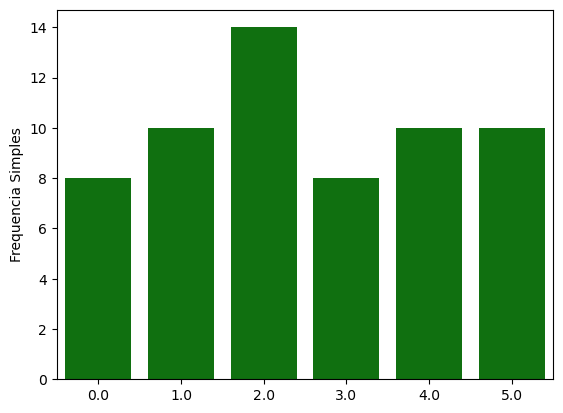

In [6]:
sns.barplot(x = df_Satisfacao.index, y = "Frequencia Simples", data = df_Satisfacao, color = 'g')

<AxesSubplot:xlabel='Frequencia Simples'>

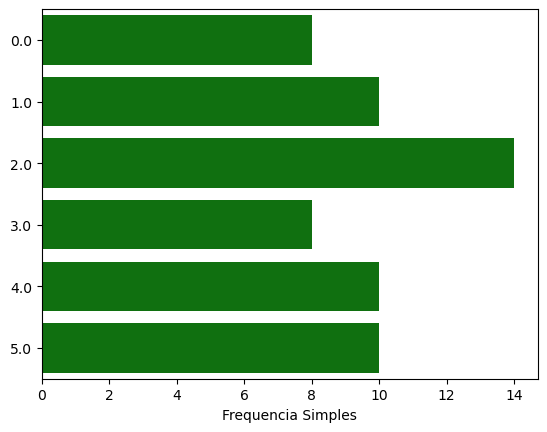

In [7]:
sns.barplot(x = "Frequencia Simples", y = df_Satisfacao.index, data = df_Satisfacao, color = 'g', orient = "h")

Frequência Relativa

<AxesSubplot:ylabel='Frequencia Relativa'>

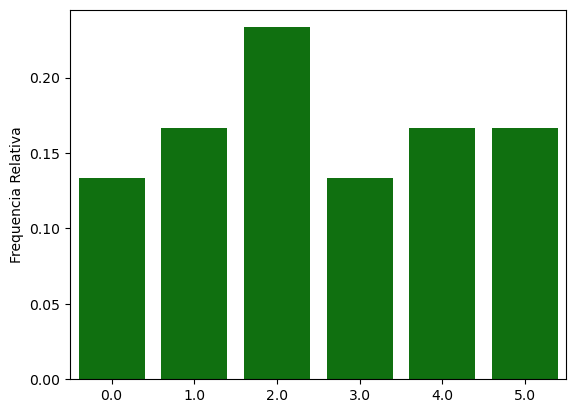

In [8]:
sns.barplot(x = df_Satisfacao.index, y = "Frequencia Relativa", data = df_Satisfacao, color = 'g')

Frequência Relativa Percentual

<AxesSubplot:ylabel='Frequencia Relativa Percentual'>

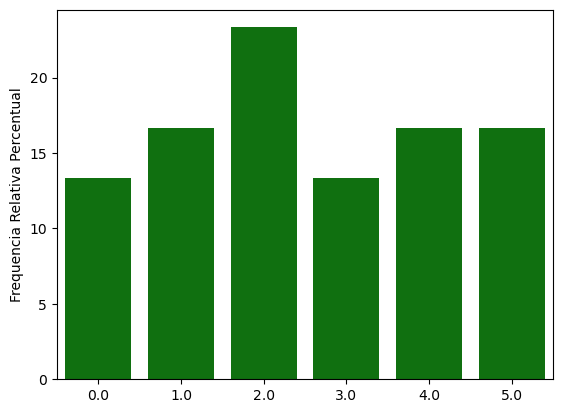

In [9]:
sns.barplot(x = df_Satisfacao.index, y = "Frequencia Relativa Percentual", data = df_Satisfacao, color = 'g')

Text(0.5, 1.0, 'Gráfico da Frequência Relativa Percentual')

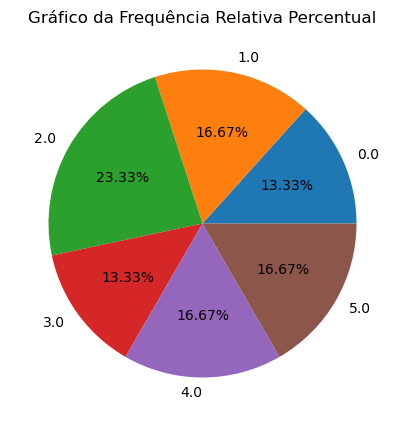

In [10]:
fig, ax = plt.subplots(figsize = (12,5))
ax.pie(df_Satisfacao["Frequencia Relativa Percentual"], labels = df_Satisfacao.index, autopct = "%.2f%%")
ax.set_title("Gráfico da Frequência Relativa Percentual")

Frequência Acumulada

<AxesSubplot:ylabel='Frequencia Acumulada'>

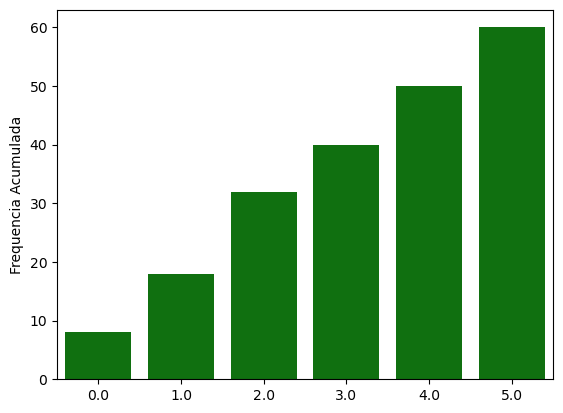

In [11]:
sns.barplot(x = df_Satisfacao.index, y = "Frequencia Acumulada", data = df_Satisfacao, color = 'g')

Frequencia Relativa Acumulada

<AxesSubplot:ylabel='Frequencia Relativa Acumulada'>

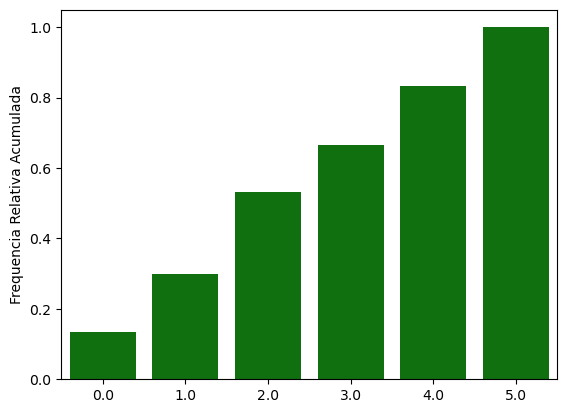

In [12]:
sns.barplot(x = df_Satisfacao.index, y = "Frequencia Relativa Acumulada", data = df_Satisfacao, color = 'g')

# Frequência de Origem

In [13]:
df_Origem = pd.DataFrame(df["Origem"].value_counts().sort_index()).rename(columns={"Origem":"Frequencia Simples"})
df_Origem["Frequencia Relativa"] = df["Origem"].value_counts(normalize = True)
df_Origem["Frequencia Relativa Percentual"] = df_Origem["Frequencia Relativa"] * 100
df_Origem["Frequencia Acumulada"] = df_Origem["Frequencia Simples"].cumsum()
df_Origem["Frequencia Relativa Acumulada"] = df_Origem["Frequencia Relativa"].cumsum()

In [14]:
df_Origem

,Frequencia Simples,Frequencia Relativa,Frequencia Relativa Percentual,Frequencia Acumulada,Frequencia Relativa Acumulada
Agreste,9,0.150000,15.000000,9,0.150000
Borborema,13,0.216667,21.666667,22,0.366667
Brejo,10,0.166667,16.666667,32,0.533333
Cariri,6,0.100000,10.000000,38,0.633333
Litoral,12,0.200000,20.000000,50,0.833333
Sertão,10,0.166667,16.666667,60,1.000000


In [70]:
centralidade_origem = {}
for coluna in df_Origem:   
    dado = df_Origem[coluna]
    centralidade_origem[coluna] = central(dado)

In [71]:
centralidade_origem

{'Frequencia Simples': {'Média': 10.0,
  'Média Geométrica': 9.718212541300312,
  'Média Harmônica': 9.40388479571333,
  'Mediana': 10.0,
  'Moda': 10},
 'Frequencia Relativa': {'Média': 0.16666666666666666,
  'Média Geométrica': 0.16197020902167186,
  'Média Harmônica': 0.1567314132618888,
  'Mediana': 0.16666666666666666,
  'Moda': 0.16666666666666666},
 'Frequencia Relativa Percentual': {'Média': 16.666666666666668,
  'Média Geométrica': 16.197020902167186,
  'Média Harmônica': 15.67314132618888,
  'Mediana': 16.666666666666664,
  'Moda': 16.666666666666664},
 'Frequencia Acumulada': {'Média': 35.166666666666664,
  'Média Geométrica': 29.953897315116574,
  'Média Harmônica': 23.92362500364334,
  'Mediana': 35.0,
  'Moda': 0     9
  1    22
  2    32
  3    38
  4    50
  5    60
  Name: Frequencia Acumulada, dtype: int64},
 'Frequencia Relativa Acumulada': {'Média': 0.5861111111111111,
  'Média Geométrica': 0.49923162191860965,
  'Média Harmônica': 0.39872708339405566,
  'Mediana': 

In [72]:
dispersao_origem = {}
for colunas in df_Origem:
    dados2 = df_Origem[colunas]
    dispersao_origem[colunas] = dispersao(dados2)

In [73]:
dispersao_origem

{'Frequencia Simples': {'Variância': 5.0,
  'Desvio Padrão': 2.23606797749979,
  'Desvio Absoluto': 1.6666666666666667,
  'Coeficiente de Variação': 0.223606797749979},
 'Frequencia Relativa': {'Variância': 0.0013888888888888892,
  'Desvio Padrão': 0.037267799624996496,
  'Desvio Absoluto': 0.02777777777777778,
  'Coeficiente de Variação': 0.223606797749979},
 'Frequencia Relativa Percentual': {'Variância': 13.888888888888891,
  'Desvio Padrão': 3.72677996249965,
  'Desvio Absoluto': 2.777777777777779,
  'Coeficiente de Variação': 0.22360679774997896},
 'Frequencia Acumulada': {'Variância': 285.47222222222223,
  'Desvio Padrão': 16.895923242670765,
  'Desvio Absoluto': 14.166666666666666,
  'Coeficiente de Variação': 0.48045279363044835},
 'Frequencia Relativa Acumulada': {'Variância': 0.07929783950617282,
  'Desvio Padrão': 0.2815987207111794,
  'Desvio Absoluto': 0.23611111111111108,
  'Coeficiente de Variação': 0.4804527936304483}}

## Gráficos

<AxesSubplot:ylabel='Frequencia Simples'>

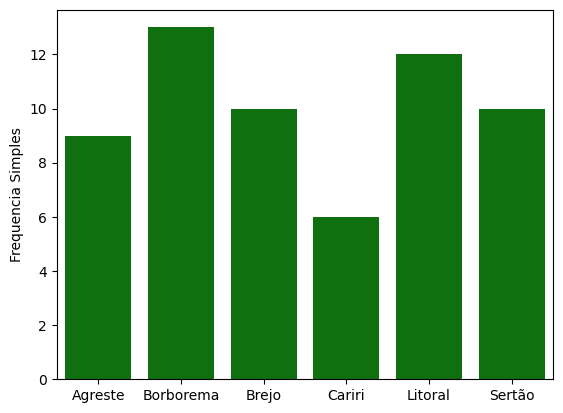

In [15]:
sns.barplot(x = df_Origem.index, y = "Frequencia Simples", data = df_Origem, color = 'g')

<AxesSubplot:xlabel='Frequencia Simples'>

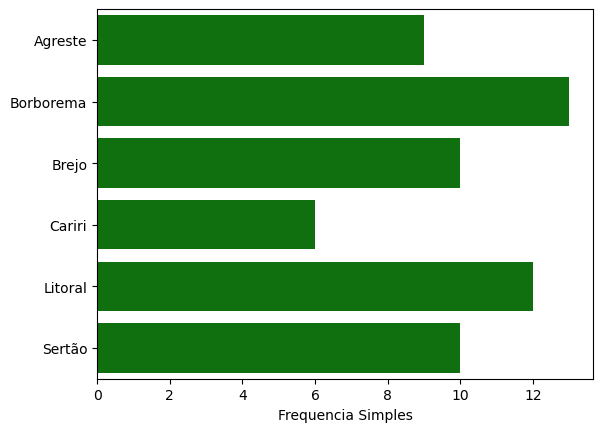

In [16]:
sns.barplot(x = "Frequencia Simples", y = df_Origem.index, data = df_Origem, color = 'g', orient = "h")

<AxesSubplot:ylabel='Frequencia Relativa'>

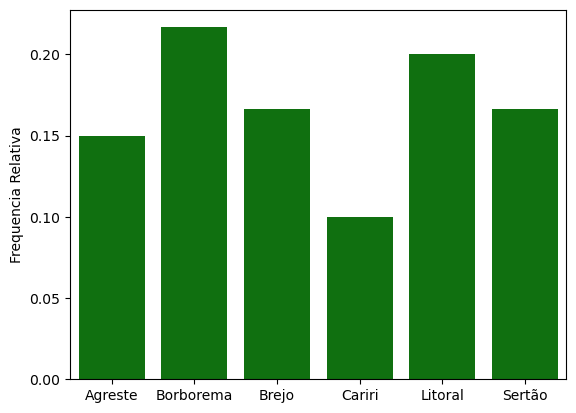

In [17]:
sns.barplot(x = df_Origem.index, y = "Frequencia Relativa", data = df_Origem, color = 'g')

<AxesSubplot:ylabel='Frequencia Relativa Percentual'>

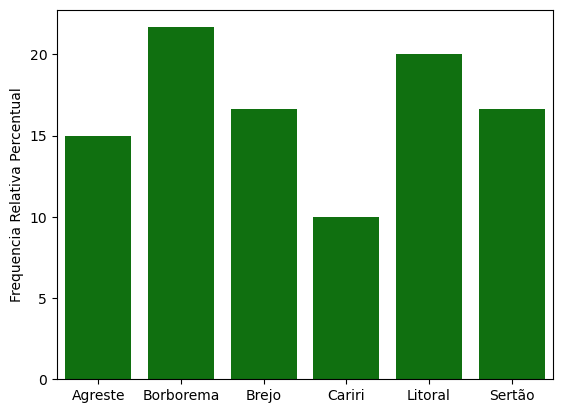

In [18]:
sns.barplot(x = df_Origem.index, y = "Frequencia Relativa Percentual", data = df_Origem, color = 'g')

Text(0.5, 1.0, 'Gráfico da Frequência Relativa Percentual')

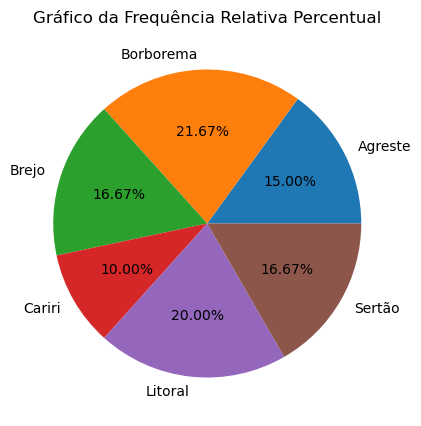

In [19]:
fig, ax = plt.subplots(figsize = (12,5))
ax.pie(df_Origem["Frequencia Relativa Percentual"], labels = df_Origem.index, autopct = "%.2f%%")
ax.set_title("Gráfico da Frequência Relativa Percentual")

<AxesSubplot:ylabel='Frequencia Acumulada'>

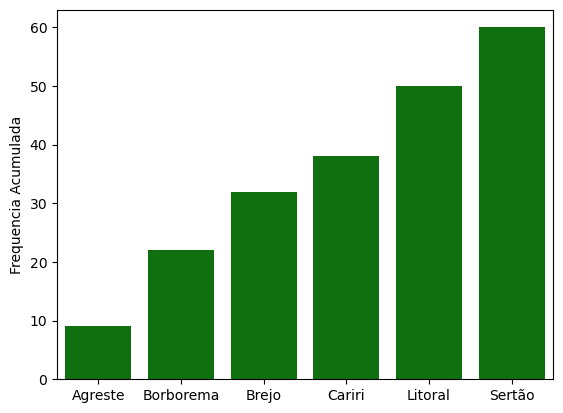

In [20]:
sns.barplot(x = df_Origem.index, y = "Frequencia Acumulada", data = df_Origem, color = 'g')

<AxesSubplot:ylabel='Frequencia Relativa Acumulada'>

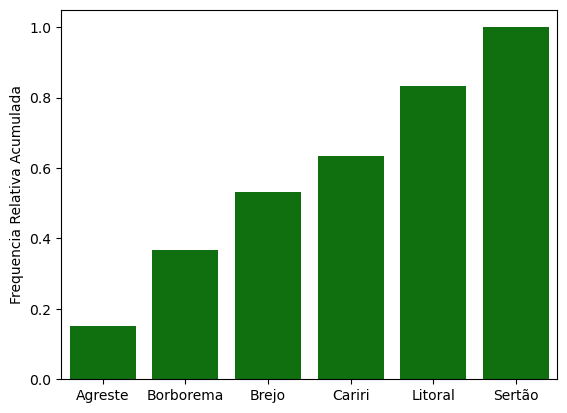

In [21]:
sns.barplot(x = df_Origem.index, y = "Frequencia Relativa Acumulada", data = df_Origem, color = 'g')

# Frequência de Altura

In [22]:
df = df[["Altura", "Peso"]].astype(float)


In [23]:
altura_ordenada = df
altura_ordenada = altura_ordenada.sort_values(by = "Altura")
altura_ordenada = altura_ordenada[["Altura", "Peso"]].astype(float)

In [24]:
altura_maxima = altura_ordenada["Altura"].max()
altura_minima = altura_ordenada["Altura"].min()
amplitude_total = altura_maxima - altura_minima
H = amplitude_total / 5

In [25]:
Valores_li = []
for i in range(5):
  Valores_li.append(altura_minima + H * i)

In [26]:
Valores_Li = [] 
for i in range(1,6):
  Valores_Li.append(altura_minima + H * i)

In [27]:
df_Altura = pd.DataFrame({"li" : Valores_li, "Li" : Valores_Li})
df_Altura.index = ["1", "2", "3", "4", "5"]
intervalo = ["[   -   )", "[   -   )", "[   -   )", "[   -   )", "[   -   ]"]
df_Altura.insert(1, "Intervalo", intervalo)

In [28]:
Fi_altura = []
for i in range(4):
    Fi_altura.append(altura_ordenada[(altura_ordenada["Altura"] >= Valores_li[i]) & 
                                     (altura_ordenada["Altura"] < Valores_Li[i])].shape[0])
Fi_altura.append(altura_ordenada[(altura_ordenada["Altura"] >= Valores_li[4]) & 
                                 (altura_ordenada["Altura"] <= Valores_Li[4])].shape[0])
Fi_altura

[2, 15, 36, 52, 15]

In [29]:
df_Altura["Frequencia Simples"] = Fi_altura
Fa_altura = df_Altura["Frequencia Simples"].cumsum()
Fr_altura = df_Altura["Frequencia Simples"]/Fa_altura.max()
FRP_altura = Fr_altura *100
FRA_altura = Fr_altura.cumsum()

df_Altura["Frequencia Relativa"] = Fr_altura
df_Altura["Frequencia Relativa Percentual"] = FRP_altura
df_Altura["Frequencia Acumulada"] = Fa_altura
df_Altura["Frequencia Relativa Acumulada"] = FRA_altura

In [30]:
df_Altura

,li,Intervalo,Li,Frequencia Simples,Frequencia Relativa,Frequencia Relativa Percentual,Frequencia Acumulada,Frequencia Relativa Acumulada
1,105.870,[ - ),128.242,2,0.016667,1.666667,2,0.016667
2,128.242,[ - ),150.614,15,0.125000,12.500000,17,0.141667
3,150.614,[ - ),172.986,36,0.300000,30.000000,53,0.441667
4,172.986,[ - ),195.358,52,0.433333,43.333333,105,0.875000
5,195.358,[ - ],217.730,15,0.125000,12.500000,120,1.000000


In [78]:
centralidade_altura = {}
for coluna in df_Altura.drop(["li", "Intervalo", "Li"], axis = 1):   
    dado = df_Altura[coluna]
    centralidade_altura[coluna] = central(dado)

In [79]:
centralidade_altura

{'Frequencia Simples': {'Média': 24.0,
  'Média Geométrica': 15.314529954265891,
  'Média Harmônica': 7.349246231155779,
  'Mediana': 15.0,
  'Moda': 15},
 'Frequencia Relativa': {'Média': 0.2,
  'Média Geométrica': 0.12762108295221578,
  'Média Harmônica': 0.061243718592964826,
  'Mediana': 0.125,
  'Moda': 0.125},
 'Frequencia Relativa Percentual': {'Média': 20.0,
  'Média Geométrica': 12.762108295221578,
  'Média Harmônica': 6.124371859296483,
  'Mediana': 12.5,
  'Moda': 12.5},
 'Frequencia Acumulada': {'Média': 59.4,
  'Média Geométrica': 29.595458077289592,
  'Média Harmônica': 8.395620486538654,
  'Mediana': 53.0,
  'Moda': 0      2
  1     17
  2     53
  3    105
  4    120
  Name: Frequencia Acumulada, dtype: int64},
 'Frequencia Relativa Acumulada': {'Média': 0.495,
  'Média Geométrica': 0.24662881731074654,
  'Média Harmônica': 0.06996350405448878,
  'Mediana': 0.44166666666666665,
  'Moda': 0    0.016667
  1    0.141667
  2    0.441667
  3    0.875000
  4    1.000000
  Nam

In [80]:
dispersao_altura = {}
for colunas in df_Altura.drop(["li", "Intervalo", "Li"], axis = 1):
    dados2 = df_Altura[colunas]
    dispersao_altura[colunas] = dispersao(dados2)

In [81]:
dispersao_altura

{'Frequencia Simples': {'Variância': 314.8,
  'Desvio Padrão': 17.7426040929735,
  'Desvio Absoluto': 16.0,
  'Coeficiente de Variação': 0.7392751705405626},
 'Frequencia Relativa': {'Variância': 0.021861111111111116,
  'Desvio Padrão': 0.14785503410811252,
  'Desvio Absoluto': 0.13333333333333336,
  'Coeficiente de Variação': 0.7392751705405626},
 'Frequencia Relativa Percentual': {'Variância': 218.61111111111114,
  'Desvio Padrão': 14.785503410811252,
  'Desvio Absoluto': 13.333333333333332,
  'Coeficiente de Variação': 0.7392751705405626},
 'Frequencia Acumulada': {'Variância': 2177.04,
  'Desvio Padrão': 46.65876123516354,
  'Desvio Absoluto': 42.48,
  'Coeficiente de Variação': 0.7855010308950091},
 'Frequencia Relativa Acumulada': {'Variância': 0.1511833333333333,
  'Desvio Padrão': 0.38882301029302946,
  'Desvio Absoluto': 0.354,
  'Coeficiente de Variação': 0.785501030895009}}

## Gráficos

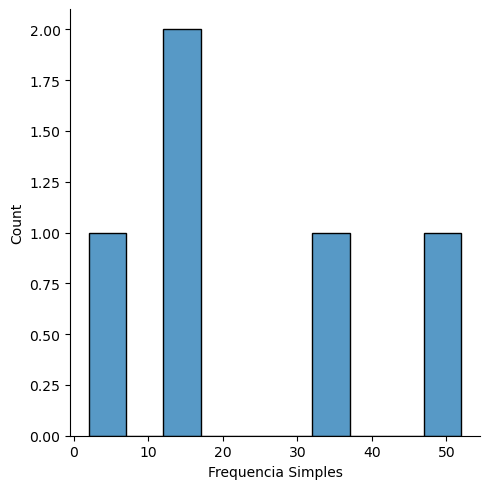

In [40]:
sns.displot(df_Altura, x = "Frequencia Simples", bins = 10)

<AxesSubplot:xlabel='li', ylabel='Frequencia Simples'>

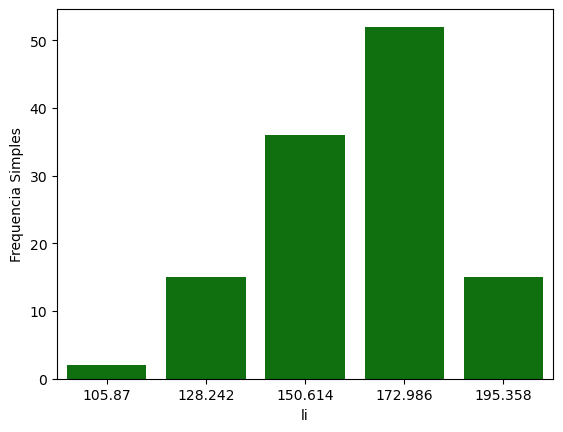

In [86]:
sns.barplot(x = "li", y = "Frequencia Simples", data = df_Altura, color = 'g')

Text(0.5, 1.0, 'Gráfico da Frequência Relativa Percentual')

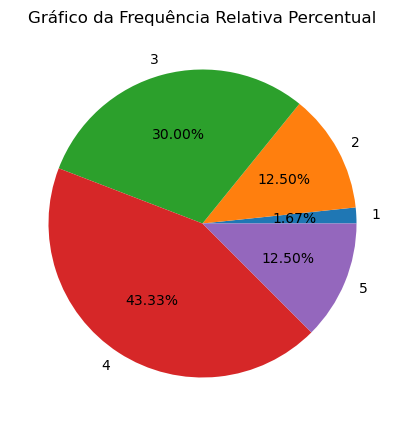

In [87]:
fig, ax = plt.subplots(figsize = (12,5))
ax.pie(df_Altura["Frequencia Relativa Percentual"], labels = df_Altura.index, autopct = "%.2f%%")
ax.set_title("Gráfico da Frequência Relativa Percentual")

# Frequência de Peso

In [32]:
def classes(peso):
    if (peso >= peso_min  and peso < (peso_min + HP)):
        return 1
    elif (peso >= (peso_min + HP) and peso < (peso_min + 2*HP)):
        return 2
    elif (peso >= (peso_min + 2*HP) and peso < (peso_min + 3*HP)):
        return 3
    elif (peso >= (peso_min + 3*HP) and peso < (peso_min + 4*HP)):
        return 4
    elif (peso >= (peso_min + 4*HP) and peso <= (peso_min + 5*HP)):
        return 5

In [33]:
peso_max = df["Peso"].max()
peso_min = df["Peso"].min()
amplitude_total_p = peso_max - peso_min
HP = amplitude_total_p / 5

In [34]:
Valores_lip = []
for i in range(5):
  Valores_lip.append(peso_min + HP * i)
Valores_Lip = [] 
for i in range(1,6):
  Valores_Lip.append(peso_min + HP * i)

In [35]:
for linha in df.index:
    df.loc[linha, "Classe"] = classes(df.loc[linha, "Peso"])

In [36]:
df_Peso = pd.DataFrame(
    df["Classe"].value_counts().sort_index()).rename(columns={"Classe":"Frequencia Simples"})
df_Peso["Frequencia Relativa"] = df["Classe"].value_counts(normalize=  True)
df_Peso["Frequencia Relativa Percentual"] = df_Peso["Frequencia Relativa"] * 100
df_Peso["Frequência Acumulada"] = df_Peso["Frequencia Simples"].cumsum()
df_Peso["Frequencia Relativa Acumulada"] = df_Peso["Frequencia Relativa"].cumsum()

In [37]:
intervalo = ["[   -   )", "[   -   )", "[   -   )", "[   -   )", "[   -   ]"]
df_Peso.insert(0, "li", Valores_lip)
df_Peso.insert(1, "Intervalo", intervalo)
df_Peso.insert(2, "Li", Valores_Lip)

In [38]:
df_Peso

,li,Intervalo,Li,Frequencia Simples,Frequencia Relativa,Frequencia Relativa Percentual,Frequência Acumulada,Frequencia Relativa Acumulada
1.0,44.813363,[ - ),55.266113,8,0.066667,6.666667,8,0.066667
2.0,55.266113,[ - ),65.718863,31,0.258333,25.833333,39,0.325000
3.0,65.718863,[ - ),76.171613,50,0.416667,41.666667,89,0.741667
4.0,76.171613,[ - ),86.624363,25,0.208333,20.833333,114,0.950000
5.0,86.624363,[ - ],97.077112,6,0.050000,5.000000,120,1.000000


In [82]:
centralidade_peso = {}
for coluna in df_Peso.drop(["li", "Intervalo", "Li"], axis = 1):   
    dado = df_Peso[coluna]
    centralidade_peso[coluna] = central(dado)

In [83]:
centralidade_peso

{'Frequencia Simples': {'Média': 24.0,
  'Média Geométrica': 17.9433111775133,
  'Média Harmônica': 13.023386080380899,
  'Mediana': 25.0,
  'Moda': 0     6
  1     8
  2    25
  3    31
  4    50
  Name: Frequencia Simples, dtype: int64},
 'Frequencia Relativa': {'Média': 0.2,
  'Média Geométrica': 0.14952759314594424,
  'Média Harmônica': 0.1085282173365075,
  'Mediana': 0.20833333333333334,
  'Moda': 0    0.050000
  1    0.066667
  2    0.208333
  3    0.258333
  4    0.416667
  Name: Frequencia Relativa, dtype: float64},
 'Frequencia Relativa Percentual': {'Média': 20.0,
  'Média Geométrica': 14.95275931459442,
  'Média Harmônica': 10.85282173365075,
  'Mediana': 20.833333333333336,
  'Moda': 0     5.000000
  1     6.666667
  2    20.833333
  3    25.833333
  4    41.666667
  Name: Frequencia Relativa Percentual, dtype: float64},
 'Frequência Acumulada': {'Média': 74.0,
  'Média Geométrica': 51.99075684203176,
  'Média Harmônica': 27.935732016232198,
  'Mediana': 89.0,
  'Moda': 0 

In [84]:
dispersao_peso = {}
for colunas in df_Peso.drop(["li", "Intervalo", "Li"], axis = 1):
    dados2 = df_Peso[colunas]
    dispersao_peso[colunas] = dispersao(dados2)

In [85]:
dispersao_peso

{'Frequencia Simples': {'Variância': 261.2,
  'Desvio Padrão': 16.161683080669537,
  'Desvio Absoluto': 13.6,
  'Coeficiente de Variação': 0.673403461694564},
 'Frequencia Relativa': {'Variância': 0.018138888888888892,
  'Desvio Padrão': 0.13468069233891283,
  'Desvio Absoluto': 0.11333333333333336,
  'Coeficiente de Variação': 0.6734034616945641},
 'Frequencia Relativa Percentual': {'Variância': 181.38888888888894,
  'Desvio Padrão': 13.468069233891283,
  'Desvio Absoluto': 11.333333333333336,
  'Coeficiente de Variação': 0.6734034616945641},
 'Frequência Acumulada': {'Variância': 1904.4,
  'Desvio Padrão': 43.639431710323635,
  'Desvio Absoluto': 40.4,
  'Coeficiente de Variação': 0.5897220501395086},
 'Frequencia Relativa Acumulada': {'Variância': 0.13225000000000003,
  'Desvio Padrão': 0.36366193091936366,
  'Desvio Absoluto': 0.3366666666666667,
  'Coeficiente de Variação': 0.5897220501395086}}

Text(0.5, 1.0, 'Gráfico da Frequência Relativa Percentual')

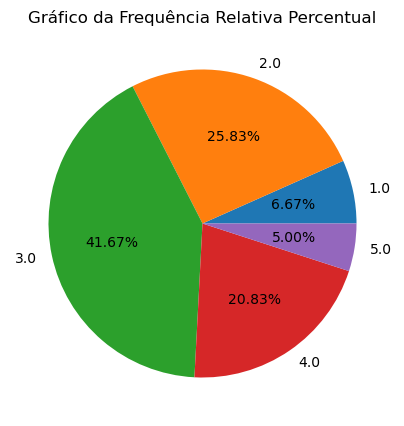

In [88]:
fig, ax = plt.subplots(figsize = (12,5))
ax.pie(df_Peso["Frequencia Relativa Percentual"], labels = df_Peso.index, autopct = "%.2f%%")
ax.set_title("Gráfico da Frequência Relativa Percentual")